In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Iris (1).csv')

In [3]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.shape

(150, 6)

In [6]:
len(df[df.duplicated()])

0

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df['Species']=pd.get_dummies(df['Species']).values

In [11]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
133,134,6.3,2.8,5.1,1.5,0
64,65,5.6,2.9,3.6,1.3,0
85,86,6.0,3.4,4.5,1.6,0
142,143,5.8,2.7,5.1,1.9,0
107,108,7.3,2.9,6.3,1.8,0
17,18,5.1,3.5,1.4,0.3,1
146,147,6.3,2.5,5.0,1.9,0
42,43,4.4,3.2,1.3,0.2,1
4,5,5.0,3.6,1.4,0.2,1
139,140,6.9,3.1,5.4,2.1,0


In [12]:
df.drop('Id',axis=1,inplace=True)

In [13]:
X=df.drop('Species',axis=1)
y=df['Species']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3 ,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train.iloc[:,:]=ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:]=ss.transform(X_test.iloc[:,:]) 

In [17]:
X_train.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,-0.413416,-1.464401,-0.100146,-0.32150
133,0.551222,-0.495821,0.717711,0.35365
137,0.671802,0.230614,0.951384,0.75874


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

In [19]:
lr= LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [20]:
Y_pred_lr=lr.predict(X_test)
Y_pred_lr[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [21]:
Y_pred_lr_train=lr.predict(X_train)

In [22]:
print('Train accuracy score:',accuracy_score(Y_train,Y_pred_lr_train))
print('Test accuracy score:',accuracy_score(Y_test,Y_pred_lr))

Train accuracy score: 1.0
Test accuracy score: 1.0


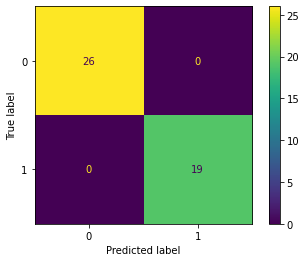

In [23]:
ConfusionMatrixDisplay.from_estimator(lr,X_test,Y_test)  
plt.show()

In [24]:
print(classification_report(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [25]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [26]:
Y_pred_gnb=gnb.predict(X_test)
Y_pred_gnb[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [27]:
Y_pred_gnb_train=gnb.predict(X_train)

In [28]:
print('Train accuracy score:',accuracy_score(Y_train,Y_pred_gnb_train))
print('Test accuracy score:',accuracy_score(Y_test,Y_pred_gnb))

Train accuracy score: 1.0
Test accuracy score: 1.0


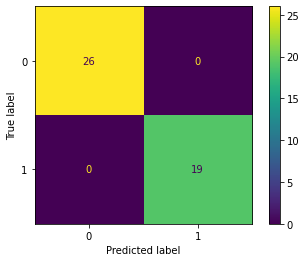

In [29]:
ConfusionMatrixDisplay.from_estimator(gnb,X_test,Y_test)  
plt.show()

In [30]:
print(classification_report(Y_test,Y_pred_gnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [32]:
Y_pred_knn = knn.predict(X_test)
Y_pred_knn[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [33]:
Y_pred_knn_train=knn.predict(X_train)

In [34]:
print('Train accuracy score:',accuracy_score(Y_train,Y_pred_knn_train))
print('Test accuracy score:',accuracy_score(Y_test,Y_pred_knn))

Train accuracy score: 1.0
Test accuracy score: 1.0


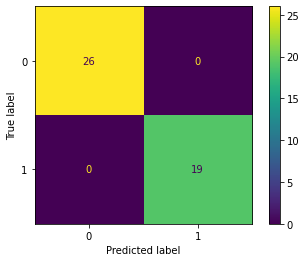

In [35]:
ConfusionMatrixDisplay.from_estimator(knn,X_test,Y_test)  
plt.show()

In [36]:
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

